<a href="https://colab.research.google.com/github/Dhruvp187/linear_regrassion/blob/main/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 3

In [ ]:
#"I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work."

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import matplotlib as map

data = pd.read_csv('penguins_size.csv')

data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
data.describe()
data.max()
data.value_counts()
data.info()
data.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
data['species'] = data.species.astype('category')
data['sex'] = data.sex.astype('category')
data['island'] = data.island.astype('category')

data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [ ]:
df_min_max_scaled = data.copy()

column = 'culmen_length_mm'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
column = 'culmen_depth_mm'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
column = 'flipper_length_mm'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
column = 'body_mass_g'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

data = df_min_max_scaled

print(data)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen          0.254545         0.666667           0.152542   
1    Adelie  Torgersen          0.269091         0.511905           0.237288   
2    Adelie  Torgersen          0.298182         0.583333           0.389831   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen          0.167273         0.738095           0.355932   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe          0.534545         0.142857           0.728814   
341  Gentoo     Biscoe          0.665455         0.309524           0.847458   
342  Gentoo     Biscoe          0.476364         0.202381           0.677966   
343  Gentoo     Biscoe          0.647273         0.357143           0.694915   

     body_mass_g     sex  
0       0.29

In [ ]:
data.replace(to_replace=['MALE','FEMALE'] , value=["1.0", "2.0"], inplace=True)

data['sex'] = pd.to_numeric(data['sex'],errors = 'coerce')
data.dtypes


species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                   float64
dtype: object

In [ ]:
data = data.drop(['species','island'], axis=1)
data = data.drop(labels=[3,8,9,10,11,47,246,286,324,336,339], axis=0)

print(data)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0            0.254545         0.666667           0.152542     0.291667  1.0
1            0.269091         0.511905           0.237288     0.305556  2.0
2            0.298182         0.583333           0.389831     0.152778  2.0
4            0.167273         0.738095           0.355932     0.208333  2.0
5            0.261818         0.892857           0.305085     0.263889  1.0
..                ...              ...                ...          ...  ...
338          0.549091         0.071429           0.711864     0.618056  2.0
340          0.534545         0.142857           0.728814     0.597222  2.0
341          0.665455         0.309524           0.847458     0.847222  1.0
342          0.476364         0.202381           0.677966     0.694444  2.0
343          0.647273         0.357143           0.694915     0.750000  1.0

[333 rows x 5 columns]


In [ ]:
X = data.drop("sex", 1)
Y = data['sex']

print("X=\n", X,"\n\nY=\n", Y)

X=
      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0            0.254545         0.666667           0.152542     0.291667
1            0.269091         0.511905           0.237288     0.305556
2            0.298182         0.583333           0.389831     0.152778
4            0.167273         0.738095           0.355932     0.208333
5            0.261818         0.892857           0.305085     0.263889
..                ...              ...                ...          ...
338          0.549091         0.071429           0.711864     0.618056
340          0.534545         0.142857           0.728814     0.597222
341          0.665455         0.309524           0.847458     0.847222
342          0.476364         0.202381           0.677966     0.694444
343          0.647273         0.357143           0.694915     0.750000

[333 rows x 4 columns] 

Y=
 0      1.0
1      2.0
2      2.0
4      2.0
5      1.0
      ... 
338    2.0
340    2.0
341    1.0
342    2.0
343 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
def split(X, Y, test_size=0.2):

    i = int((1 - test_size) * X.shape[0])
    o = np.random.permutation(X.shape[0])

    X_train, X_test = np.split(np.take(X,o,axis=0), [i])
    Y_train, Y_test = np.split(np.take(Y,o), [i])
    return X_train, X_test, Y_train, Y_test


X_train, X_test, Y_train, Y_test = split(X,Y)

xtrain = X_train
ytrain = Y_train
xtest = X_test
ytest = Y_test

# print(X_train)
# print(Y_train)
# print(X_test)
# print(Y_test)
# print(xtrain)
# print(ytrain)
# print(xtest)
# print(ytest)

In [ ]:
print (xtrain.shape)
print (ytrain.shape)
print (xtest.shape)
print (ytest.shape)


(266, 4)
(266,)
(67, 4)
(67,)


In [ ]:
X = data.flipper_length_mm.values
Y = data.sex.values

print(X.shape)

X1_mat=np.vstack((np.ones(len(X)), X))
print(X1_mat.shape)

X_mat=np.vstack((np.ones(len(X)), X)).T

print(X_mat.shape)

beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)

print(beta_hat)

w = np.transpose(beta_hat)


(333,)
(2, 333)
(333, 2)
[ 1.75956568 -0.53785889]


In [ ]:
ypred = np.dot(beta_hat,X1_mat)
print(ytrain.shape)

MSE = np.square(np.subtract(Y,ypred)).mean()

print(MSE)


(266,)
0.23370324178541177


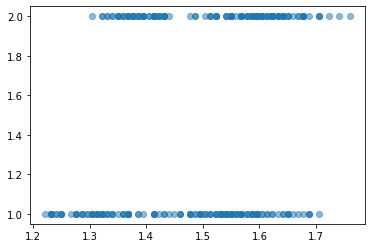

In [ ]:
plt.scatter(ypred, Y, alpha=0.5)
plt.show()

PART 4


In [ ]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import matplotlib as map

data = pd.read_csv('penguins_size.csv')

data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
data.describe()
data.max()
data.value_counts()
data.info()
data.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
data['species'] = data.species.astype('category')
data['sex'] = data.sex.astype('category')
data['island'] = data.island.astype('category')

data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [ ]:
df_min_max_scaled = data.copy()

column = 'culmen_length_mm'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
column = 'culmen_depth_mm'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
column = 'flipper_length_mm'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
column = 'body_mass_g'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

data = df_min_max_scaled

print(data)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen          0.254545         0.666667           0.152542   
1    Adelie  Torgersen          0.269091         0.511905           0.237288   
2    Adelie  Torgersen          0.298182         0.583333           0.389831   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen          0.167273         0.738095           0.355932   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe          0.534545         0.142857           0.728814   
341  Gentoo     Biscoe          0.665455         0.309524           0.847458   
342  Gentoo     Biscoe          0.476364         0.202381           0.677966   
343  Gentoo     Biscoe          0.647273         0.357143           0.694915   

     body_mass_g     sex  
0       0.29

In [ ]:
data.replace(to_replace=['MALE','FEMALE'] , value=["1.0", "2.0"], inplace=True)

data['sex'] = pd.to_numeric(data['sex'],errors = 'coerce')
data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                   float64
dtype: object

In [ ]:
data = data.drop(['species','island'], axis=1)
data = data.drop(labels=[3,8,9,10,11,47,246,286,324,336,339], axis=0)


print(data)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0            0.254545         0.666667           0.152542     0.291667  1.0
1            0.269091         0.511905           0.237288     0.305556  2.0
2            0.298182         0.583333           0.389831     0.152778  2.0
4            0.167273         0.738095           0.355932     0.208333  2.0
5            0.261818         0.892857           0.305085     0.263889  1.0
..                ...              ...                ...          ...  ...
338          0.549091         0.071429           0.711864     0.618056  2.0
340          0.534545         0.142857           0.728814     0.597222  2.0
341          0.665455         0.309524           0.847458     0.847222  1.0
342          0.476364         0.202381           0.677966     0.694444  2.0
343          0.647273         0.357143           0.694915     0.750000  1.0

[333 rows x 5 columns]


In [ ]:
X = data.drop("sex", 1)
Y = data['sex']

print("X=\n", X,"\n\nY=\n", Y)

X=
      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0            0.254545         0.666667           0.152542     0.291667
1            0.269091         0.511905           0.237288     0.305556
2            0.298182         0.583333           0.389831     0.152778
4            0.167273         0.738095           0.355932     0.208333
5            0.261818         0.892857           0.305085     0.263889
..                ...              ...                ...          ...
338          0.549091         0.071429           0.711864     0.618056
340          0.534545         0.142857           0.728814     0.597222
341          0.665455         0.309524           0.847458     0.847222
342          0.476364         0.202381           0.677966     0.694444
343          0.647273         0.357143           0.694915     0.750000

[333 rows x 4 columns] 

Y=
 0      1.0
1      2.0
2      2.0
4      2.0
5      1.0
      ... 
338    2.0
340    2.0
341    1.0
342    2.0
343 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
def split(X, Y, test_size=0.2):

    i = int((1 - test_size) * X.shape[0])
    o = np.random.permutation(X.shape[0])

    X_train, X_test = np.split(np.take(X,o,axis=0), [i])
    Y_train, Y_test = np.split(np.take(Y,o), [i])
    return X_train, X_test, Y_train, Y_test


X_train, X_test, Y_train, Y_test = split(X,Y)

xtrain = X_train
ytrain = Y_train
xtest = X_test
ytest = Y_test

# print(X_train)
# print(Y_train)
# print(X_test)
# print(Y_test)
# print(xtrain)
# print(ytrain)
# print(xtest)
# print(ytest)

In [ ]:
print (xtrain.shape)
print (ytrain.shape)
print (xtest.shape)
print (ytest.shape)

(266, 4)
(266,)
(67, 4)
(67,)


In [ ]:
X = data.flipper_length_mm.values
Y = data.sex.values

l = 0.28

X1_mat=np.vstack((np.ones(len(X)), X))
print(X1_mat.shape)

X_mat=np.vstack((np.ones(len(X)), X)).T

print(X_mat.shape)

beta_hat = np.linalg.inv((X_mat.T.dot(X_mat))+l*np.identity(2)).dot(X_mat.T).dot(Y)

print(beta_hat)


w = beta_hat.T

(2, 333)
(333, 2)
[ 1.74800323 -0.51730213]


In [ ]:
lr = beta_hat.T*beta_hat
lr = l*lr
lr = (1/2)*lr

print(lr)


[0.42777214 0.03746421]


In [ ]:
ypred = np.dot(beta_hat,X1_mat)
print(ytrain.shape)

RSE = ((1/2)*(np.square(np.subtract(Y,ypred)))).mean()
RSE = (RSE + lr).mean()

print(RSE)


(266,)
0.3494827630044971


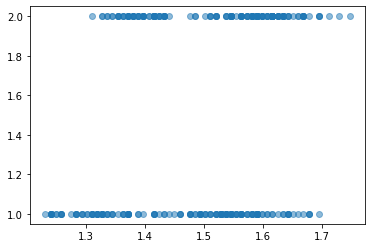

In [ ]:
plt.scatter(ypred, Y, alpha=0.5)
plt.show()